Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY**</u> | <u>**Assignment 10.2**</u>
**Name** | Cuevas, Christian Jay L.
**Section** | CPE32S3
**Date Performed**: | 5/1/2024
**Date Submitted**: | 5/4/2024
**Instructor**: | Engr. Roman M. Richard  

<hr>


#Instructions

- For this assignment, do the following:
  - Load time series data: data.csv
  - Visualize the time series
  - Fit an ARIMA Model (baseline model order = (1,1,1))
  - Improve the ARIMA Model
  - Print the model summary
  - Make a forecast (steps=10)
  - Plot the forecast
  - Perform a grid search
- Supplementary Activity:  do the same for this dataset - dataset_temperature.csv

# Dataset Context


- As I viewed the data.csv dataset, I noticed that there are 2 columns, the Month and the CO2 (ppm) columns. The month column represents the date when the data was recorded while the C02 (ppm) column is the value of C02 in ppm that was recorded constantly from 1965 to 1980.

# Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import mean_squared_error
import warnings
from math import sqrt
import matplotlib.ticker as ticker
from statsmodels.tsa.statespace.sarimax import SARIMAX

- To import the dataset, we can use the read_csv() built-in function from the pandas library. We will also be using the parameters, header, parse_dates and index_col. Header is used to specify the start of header information, parse_dates is used for indicating the column for dates and index_col is for specifying the column for the index [1][2].

In [ ]:
time_series = read_csv('https://raw.githubusercontent.com/ChristianJayCuevas/CPE-019---Emerging-Technologies-2/main/Assignment%2010.2/data.csv',
                  header=0, parse_dates=[0], index_col=0)

# Exploratory Data Analysis

- Let's first take a look at the .info() of the dataset. Here, we can see the different column name and also the data type and count of the data.

In [ ]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 1965-01-01 to 1980-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CO2 (ppm)  192 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


<hr>

**Observation**:
- In the results above, we can see that the imported dataset only has one column which is the C02 (ppm). It has 192 data entries and it's datatype is float64.

<hr>

- We can look at the first 5 rows of the series by using the .head() function.

In [ ]:
time_series.head()

,CO2 (ppm)
Month,
1965-01-01,319.32
1965-02-01,320.36
1965-03-01,320.82
1965-04-01,322.06
1965-05-01,322.17


<hr>

**Observation**:
- Here, we can observe that this series has 2 columns but in the .info() it only shows that there is 1 column. This is because of the import parameter that we used earlier which is the parse_dates. This parameters let's us declare that there is a column which contains dates and we can specifiy the location of that by using the index for the date column. This makes the month column, become the index for our dataset.


<hr>

In [ ]:
print("Size: ", time_series.size)

Size:  192


- We can look at the descriptive statistics of the series by using .describe() function.

In [ ]:
time_series.describe()

,CO2 (ppm)
count,192.000000
mean,328.463958
std,5.962682
min,317.250000
25%,323.397500
50%,328.295000
75%,333.095000
max,341.190000


<hr>

**Observation**:
- Above, we can see the count, mean, std, min, 25%, 50%, 75%, and max of the series. The count is the same as we saw in the .info() method. For the mean it is 328 and the std is 5.96. The low std indicates that the data is clustered around the mean. For the min, 25%, 50%, 75%, and max, we can observe that their values do not have a large gap with each other. This indicates that the data is clustered and there are no outliers.

<hr>

# Visualize the time series by plotting

- To visualize the time series, we can use the pyplot from the matplotlib library to plot the time series data.

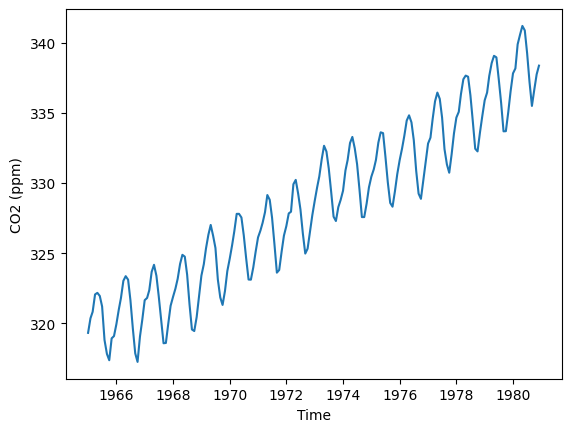

In [ ]:
plt.plot(time_series)
plt.xlabel("Time")
plt.ylabel("CO2 (ppm)")
plt.show()

<hr>

**Observation**:
- Here, we can observe that the data above ranges from 1966 to 1980. And the value for the PPM ranges from around 320 to 340. The trend that we can see here is that the amount of CO2 (ppm) increases overtime. As the year goes from 1966 to 1980, the amount of ppm fluctuates but it is increasing overall.

<hr>


# Checking for Stationarity

- What is stationarity? Stationarity is the term for having a consistent mean over a period of time. It can also be interpreted as being consistent over time.
- Why do we need to check for stationarity? We check for stationarity because some forecasting methods may require for the data to be statonary.
- A stationary data does not have any trend or seasonal effects. While non-stationary data shows the opposite, it has trend or seasonal effects [3].
- We will check for stationarity using Augmented Dicky-Fuller Test. We will be using a null hypothesis (H0) and alternate hypothesis (H1). Our Null Hypothesis is that the data has unit root and non-stationary. Our Alternate Hypothesis is that the data does not have unit root and stationary.

In [ ]:
#H0 = The dataset is non-stationary
#H1 = The dataset is stationary

def stationarity_check(ts):
    roll_mean = ts.rolling(12).mean()
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)
    if df_test[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller test:
Test Statistic                   1.269677
p-value                          0.996434
#Lags Used                      12.000000
Number of Observations Used    179.000000
Critical Value (1%)             -3.467420
Critical Value (5%)             -2.877826
Critical Value (10%)            -2.575452
dtype: float64
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


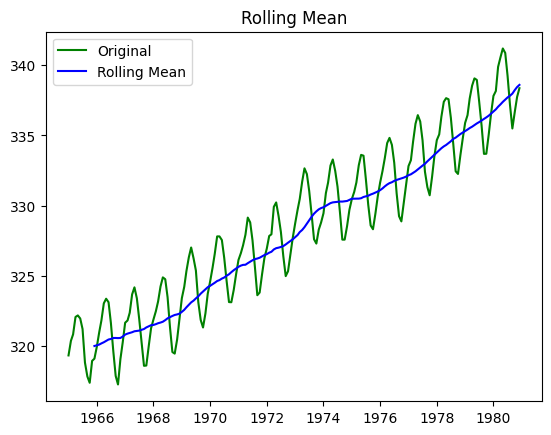

In [ ]:
stationarity_check(time_series["CO2 (ppm)"])

<hr>

**Observation**:
- We can observe from the graph above that the time-series has a visible trend of going upward as the time goes by. The rolling mean also indicates that the mean is also going upward. The p-value is greater than 0.05 so the null hypothesis was not rejected and this means that the data is non-stationary.
- Since the data is not stationary, we need to make it stationary first and this is done by differencing.


<hr>

# Differencing

- Differencing is a technique in time-series where we remove the trend and the seasonal of the data [4]. It can also help in stabilizing the mean of the data [5].
- We will be using differencing to this dataset since this dataset has a trend and we want to remove it so we can use ARIMA to model from it.
- We will be using automatic differencing by using .diff() function from the pandas library.

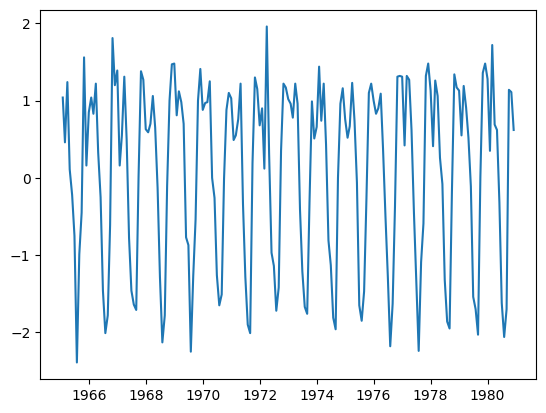

In [ ]:
diff = time_series.diff()
plt.plot(diff)
plt.show()

In [ ]:
diff.head()

,CO2 (ppm)
Month,
1965-01-01,NaN
1965-02-01,1.04
1965-03-01,0.46
1965-04-01,1.24
1965-05-01,0.11


Augmented Dickey-Fuller test:
Test Statistic                  -4.750107
p-value                          0.000068
#Lags Used                      11.000000
Number of Observations Used    179.000000
Critical Value (1%)             -3.467420
Critical Value (5%)             -2.877826
Critical Value (10%)            -2.575452
dtype: float64
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


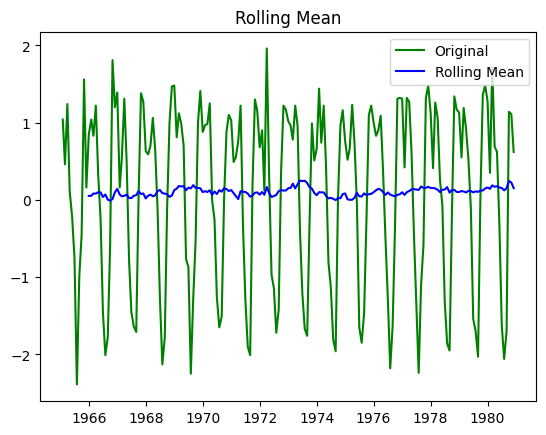

In [ ]:
stationarity_check(diff.dropna())

<hr>

**Observation**:
- We can observe above that the mean became consistent in the middle of the graph, unlike the previous rolling mean of the dataset without differencing. We can also see that p < 0.05, which means that the data is stationary.

<hr>

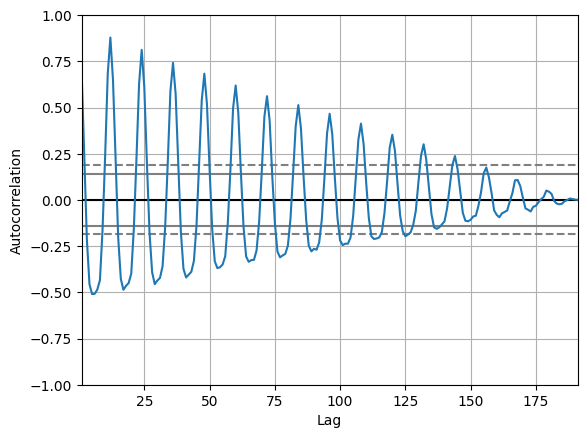

In [ ]:
autocorrelation_plot(diff.dropna())
plt.show()

<hr>

**Observation**:
- Above, we can see that the correlation of the lags looks like a sine wave that gets smaller as the value of the lag increases. We can see the value of the autocorrelation in the y-axis. We can observe here that as the lag increases, their correlation with each other decreases. This means that the relationship between lags decreases as their distance with each other increases.

<hr>

## Forecasting and Evaluation of Baseline ARIMA model

- Here, we are creating our baseline ARIMA model, using the imported ARIMA from the statsmodel library. ARIMA is a popular and powerful technique when it comes to time series forecasting.

In [ ]:
model = ARIMA(time_series, order=(1,1,1))
model_fit = model.fit()

<hr>

**Observation**:
- Here, we can observe that I used ARIMA as the model and the order is 1,1,1. These values indicates the values for p,d, and q. The p-value indicates the value for autoregression, which decides the value of the lag that will be used to predict the next value. If the value for p is 1, then the value for the current value will be based only from the previous value before it. For the d-value, this indicates the value for differencing, for example if d is 1 then the value for the current will only be subtracted to the value of the previous. Lasty, for the value of q is for the moving average that indicates the size of the moving average window [6].

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -225.819
Date:                Fri, 03 May 2024   AIC                            457.638
Time:                        22:58:33   BIC                            467.395
Sample:                    01-01-1965   HQIC                           461.590
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5590      0.087      6.441      0.000       0.389       0.729
ma.L1          0.3307      0.092      3.613      0.000       0.151       0.510
sigma2         0.6202      0.071      8.704      0.0

<hr>

**Observation**:
- Above, we can see the summary of the model, the first row indicates the various information about the model. Dependent variable is CO2 (ppm), the model is ARIMA(1,1,1), the sample is from 01-01-1965 to 12-01-1980. The no. observations is 192, the log likelihood which indicates the fitness of the model, this is also the same for AIC, BIC and HQIC. These values indicates that this model is good-fit for the dataset.

<hr>

In [ ]:
def evaluate_arima_with_order(dataset, arima_order):
    train_size = int(len(time_series) * 0.75)
    train_data, test_data = time_series[:train_size], time_series[train_size:]

    start = len(train_data)
    end = len(train_data) + len(test_data) - 1

    model = ARIMA(train_data, order=arima_order)
    results = model.fit()

    predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')
    forecast = results.predict(start=len(time_series), end=len(time_series) + 10, typ='levels')

    mse = mean_squared_error(test_data, predictions)
    rmse = sqrt(mse)
    return mse, rmse, forecast

warnings.filterwarnings("ignore")
order = (1, 1, 1)
mse, rmse, forecast = evaluate_arima_with_order(time_series, order)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 13.9282205330181
RMSE: 3.7320531256961096


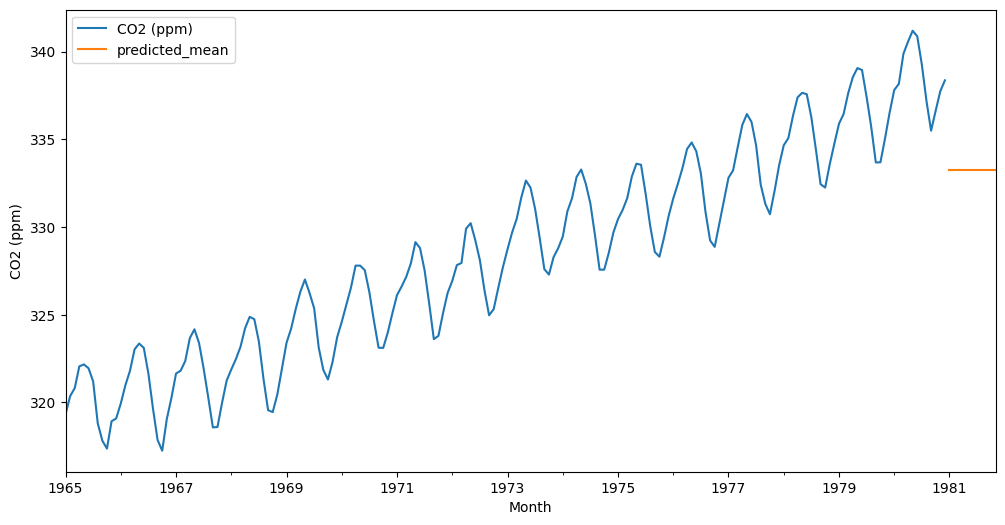

In [ ]:
def plot_time_series(time_series, forecast=None, ylabel='CO2 (ppm)', xlabel='Month'):
    formatter = ticker.StrMethodFormatter('{x:,.0f}')

    ax = time_series.plot(legend=True, figsize=(12, 6))

    if forecast is not None:
        forecast.plot(legend=True, ax=ax)

    ax.autoscale(axis='x', tight=True)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.yaxis.set_major_formatter(formatter)

    plt.show()

plot_time_series(time_series, forecast)

<hr>

**Observation**:
- Here, we can observe that the forecasted data is not correct, since it does not predict the data in the point 192 to point 202. You can see the forecast line that it does not conform to the shape of the CO2 (ppm) line, this means that ARIMA can't really predict the trend and seasonality of non-stationary data.
- ARIMA model is much useful in stationary data and for data without seasonality. This data is not stationary and it has trend and seasonality.

<hr>

# Improving ARIMA model (Grid Search and SARIMAX)

- To improve the ARIMA model, we can use Grid Search to find the best values for the p,d,q of the ARIMA model. Or we can use another model which is suitable for a dataset with trend and seasonal trend which is the SARIMAX model. I will do both so that you can observe the difference.

In [ ]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(time_series) * 0.75)
  train_data, test_data = time_series[0:train_size], time_series[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model = ARIMA(train_data, order = arima_order)
  results = model.fit()
  forecast = results.predict(len(time_series), len(time_series)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(time_series, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(time_series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=107.199
ARIMA(0, 0, 1) MSE=106.494
ARIMA(0, 0, 2) MSE=106.042
ARIMA(0, 0, 3) MSE=105.846
ARIMA(0, 1, 0) MSE=26.634
ARIMA(0, 1, 1) MSE=23.951
ARIMA(0, 1, 2) MSE=20.025
ARIMA(0, 1, 3) MSE=18.380
ARIMA(0, 2, 0) MSE=1059.451
ARIMA(0, 2, 1) MSE=942.369
ARIMA(0, 2, 2) MSE=998.307
ARIMA(0, 2, 3) MSE=6.025
ARIMA(0, 3, 0) MSE=1432.028
ARIMA(0, 3, 1) MSE=1128.208
ARIMA(0, 3, 2) MSE=945.481
ARIMA(0, 3, 3) MSE=1022.852
ARIMA(1, 0, 0) MSE=62.368
ARIMA(1, 0, 1) MSE=72.465
ARIMA(1, 0, 2) MSE=81.394
ARIMA(1, 0, 3) MSE=91.863
ARIMA(1, 1, 0) MSE=8.619
ARIMA(1, 1, 1) MSE=13.928
ARIMA(1, 1, 2) MSE=14.918
ARIMA(1, 1, 3) MSE=18.170
ARIMA(1, 2, 0) MSE=1065.125
ARIMA(1, 2, 1) MSE=1008.356
ARIMA(1, 2, 2) MSE=4.099
ARIMA(1, 2, 3) MSE=4.275
ARIMA(1, 3, 0) MSE=75819.084
ARIMA(1, 3, 1) MSE=1087.634
ARIMA(1, 3, 2) MSE=1026.289
ARIMA(1, 3, 3) MSE=1016.551
ARIMA(2, 0, 0) MSE=97.612
ARIMA(2, 0, 1) MSE=95.559
ARIMA(2, 0, 2) MSE=94.688
ARIMA(2, 0, 3) MSE=36.992
ARIMA(2, 1, 0) MSE=23.998
ARIMA(2, 1, 1)

<hr>

**Observation**:
- The best ARIMA model configuration is 9,2,0. I will now use this for the improved ARIMA model and I will also forecast new data so that we can see if the ARIMA model has really been improved.

<hr>

In [ ]:
warnings.filterwarnings("ignore")
order = (9, 2, 0)
mse, rmse, forecast = evaluate_arima_with_order(time_series, order)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 1.1498843083979555
RMSE: 1.0723265866320557


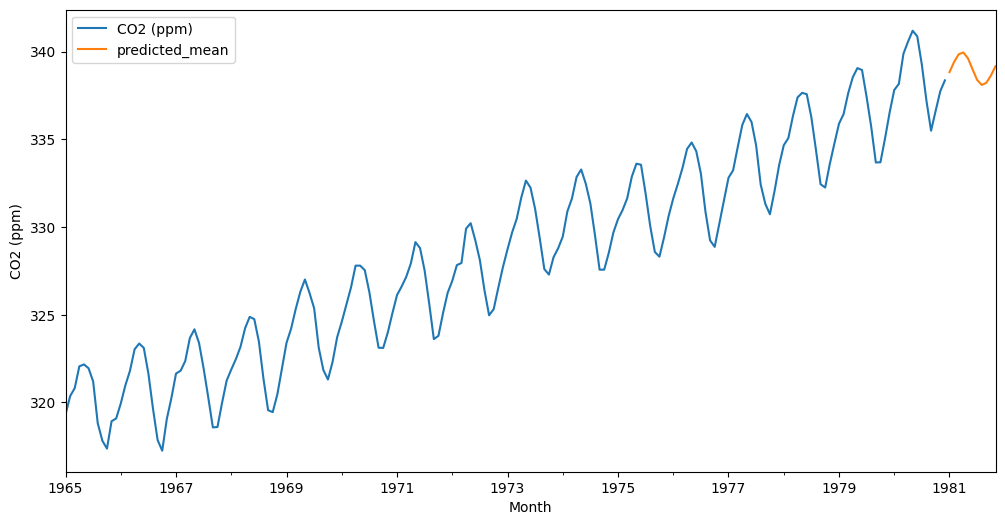

In [ ]:
plot_time_series(time_series, forecast)

<hr>

**Observation**:
- We can see above the improved ARIMA model, this is by getting the best value of its p,d,q which is (9,2,0). We can see that the forecasted data now conformed to the shape of the original model graph, but it does not really capture the shape of the previous data.
- We can try to use SARIMAX to forecast, this is because SARIMAX is much better in forecasting trends and seasonality.



<hr>

In [ ]:
model2 = SARIMAX(time_series['CO2 (ppm)'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
model2_fit = model2.fit()

In [ ]:
print(model2_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          CO2 (ppm)   No. Observations:                  192
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -54.507
Date:                            Sat, 04 May 2024   AIC                            119.014
Time:                                    11:01:54   BIC                            134.951
Sample:                                01-01-1965   HQIC                           125.477
                                     - 12-01-1980                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3746      0.185      2.026      0.043       0.012       0.737
ma.L1         -0.6734      0.158   

<Axes: xlabel='Month'>

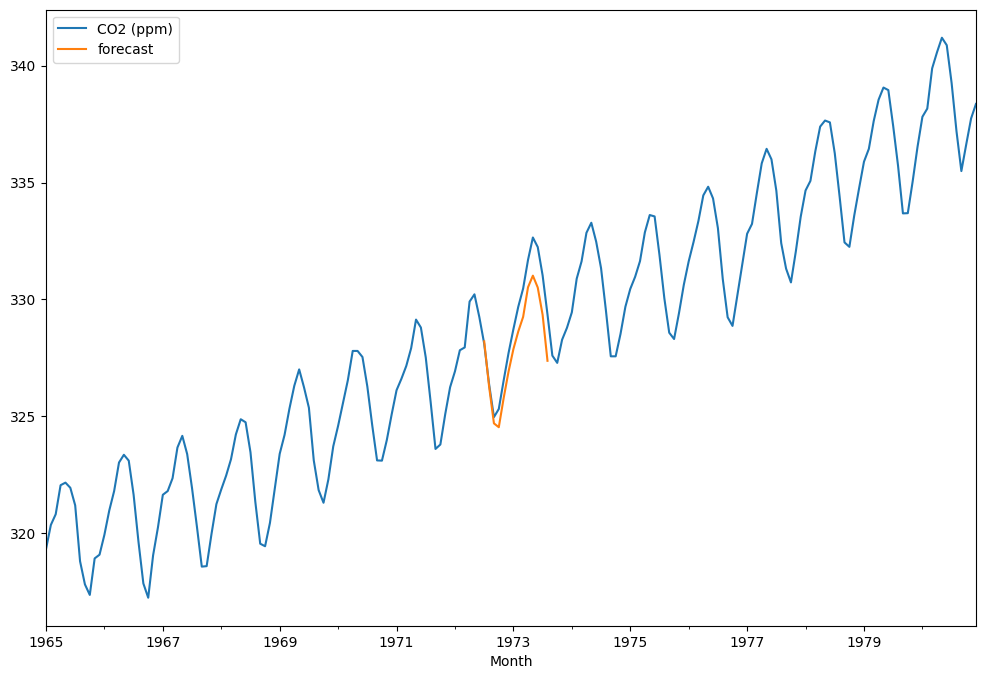

In [ ]:
time_series['forecast']=model2_fit.predict(start=90,end=103,dynamic=True)
time_series[['CO2 (ppm)','forecast']].plot(figsize=(12,8))

<hr>

**Observation**
- We can observe from above that the forecast now conforms to the shape, trend and seasonality of the CO2 (ppm) data and it now shows a very accurate prediction of the data. This shows that SARIMAX is a better model for data with trend and seasonality, or for non-stationary data. We can see the prediction much better if we create a new data and let our model forecast it.

<hr>

In [ ]:
future_dates=[time_series.index[-1]+ DateOffset(months=x)for x in range(0,10)]
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=time_series.columns)

In [ ]:
future_dates_df.tail()

,CO2 (ppm)
1981-05-01,NaN
1981-06-01,NaN
1981-07-01,NaN
1981-08-01,NaN
1981-09-01,NaN


In [ ]:
future_df=pd.concat([time_series,future_dates_df])

<Axes: >

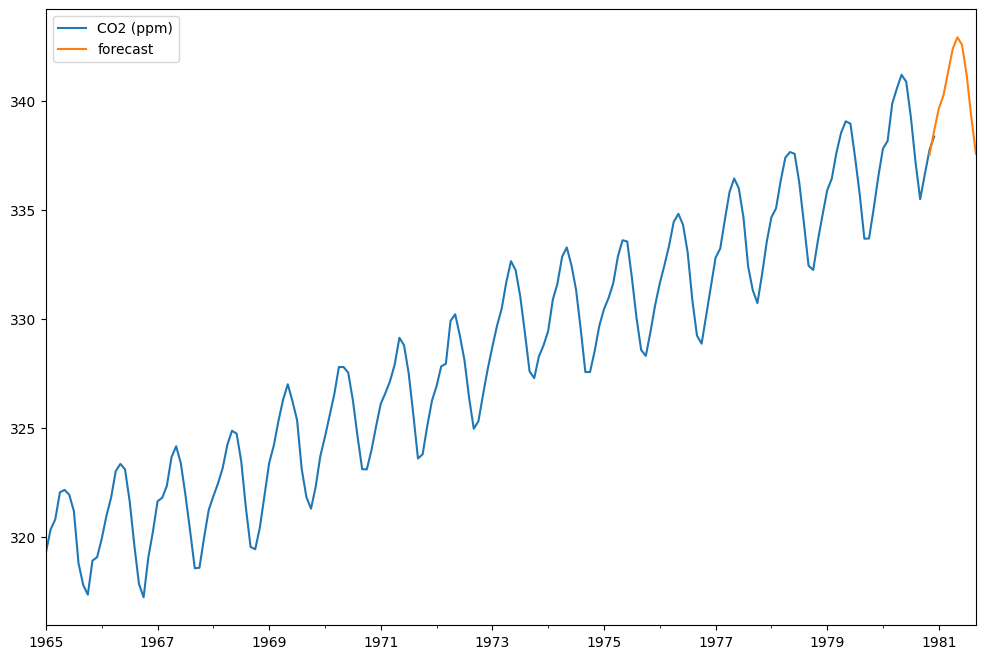

In [ ]:
future_df['forecast'] = model2_fit.predict(start = 190, end = 201, dynamic= True)
future_df[['CO2 (ppm)', 'forecast']].plot(figsize=(12, 8))

<hr>

**Observation**:
- We can observe from above that the forecasted data here is much better than the ARIMA model. The shape of the graph now is indistinguishable from the previous values, this shows the accurate prediction when using SARIMAX. Take note that this is just the baseline model of the SARIMAX, meaning we can further improve it by using grid search.

<hr>

# Supplementary Activity

## Importing the dataset

In [ ]:
mean_temp = read_csv('https://raw.githubusercontent.com/ChristianJayCuevas/CPE-019---Emerging-Technologies-2/main/Assignment%2010.2/dataset_temperature_1.csv',
                  header=0, parse_dates=[0], index_col=0)

## Performing Exploratory Data Analysis

In [ ]:
mean_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries, 1907-01 to Mean monthly temperature
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mean monthly temperature  793 non-null    object
dtypes: object(1)
memory usage: 12.4+ KB


<hr>

**Observation**:
- We can observe from above that the data type of this series is object, which is very unusual. So we will check for any object data type in this dataset.

<hr>

In [ ]:
mean_temp.tail()

,Mean monthly temperature
Month,
1972-10,51.7
1972-11,40.3
1972-12,30.3
NaN,NaN
Mean monthly temperature,1907 ? 1972


<hr>

**Observation**:
- When I checked the raw csv file, I saw this object at the end of the file and also a row with NaN value. We have to remove this and convert the series to float64.

<hr>

In [ ]:
mean_temp.dropna(inplace = True)

In [ ]:
mean_temp.drop(["Mean monthly temperature"], axis = 0, inplace = True)

In [ ]:
mean_temp.tail()

,Mean monthly temperature
Month,
1972-08,75.6
1972-09,64.1
1972-10,51.7
1972-11,40.3
1972-12,30.3


In [ ]:
mean_temp["Mean monthly temperature"] = mean_temp["Mean monthly temperature"].astype("float64")

In [ ]:
mean_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 1907-01 to 1972-12
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Mean monthly temperature  792 non-null    float64
dtypes: float64(1)
memory usage: 12.4+ KB


In [ ]:
mean_temp.describe()

,Mean monthly temperature
count,792.000000
mean,53.553662
std,15.815452
min,11.200000
25%,39.675000
50%,52.150000
75%,67.200000
max,82.400000


<hr>

**Observation:**
- We can see that I have already removed the NaN value and the "Mean monthly temperature" in the last row of the dataset. I have also converted the dataset into float64 using the .astype() method. This is to ensure that the dataset will be able to fit the procedures that will be doing later.

<hr>

## Checking for stationarity

Augmented Dickey-Fuller test:
Test Statistic                -6.481466e+00
p-value                        1.291867e-08
#Lags Used                     2.100000e+01
Number of Observations Used    7.700000e+02
Critical Value (1%)           -3.438871e+00
Critical Value (5%)           -2.865301e+00
Critical Value (10%)          -2.568773e+00
dtype: float64
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


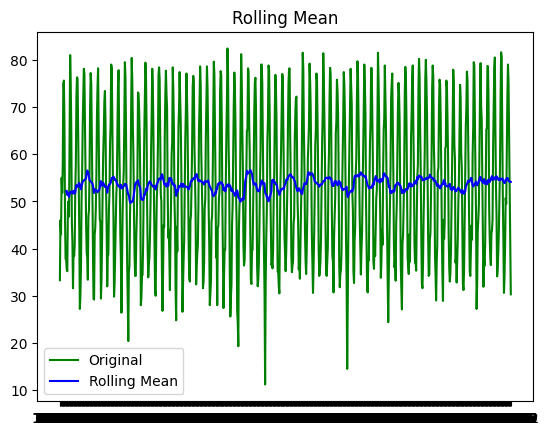

In [ ]:
stationarity_check(mean_temp["Mean monthly temperature"])

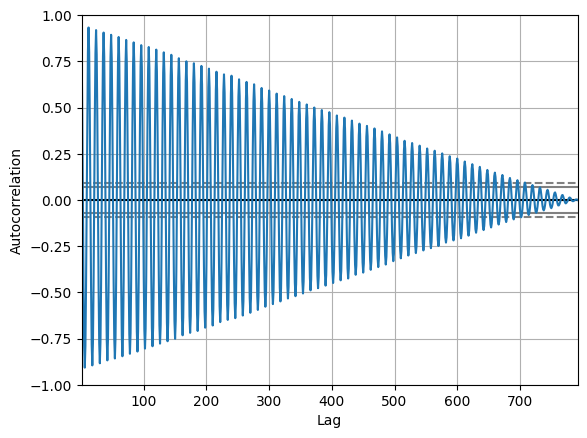

In [ ]:
autocorrelation_plot(mean_temp)
plt.show()

<hr>

**Observation**:
- We can see that the graph above is a stationary data since the rolling mean does not show any trend or seasonality. This is good since we do not have to do any differencing. We can also effectively use ARIMA for this dataset.
- For the autocorrelation plot, we can see that as the number of lags increases, their autocorrelation values decreases. This means that as the lag gets farther away from each other, they have a weaker relationship. Previous values has minimal effect to values that have a large lag gap.

<hr>

## Training ARIMA model

In [ ]:
mean_model = ARIMA(mean_temp, order=(1,1,1))
mean_model_fit = mean_model.fit()

In [ ]:
print(mean_model_fit.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -2773.596
Date:                      Sat, 04 May 2024   AIC                           5553.192
Time:                              12:37:25   BIC                           5567.212
Sample:                          01-01-1907   HQIC                          5558.581
                               - 12-01-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5458      0.060      9.104      0.000       0.428       0.663
ma.L1         -0.0333      0.072     -0.462      0.644      -0.174       0.108
sigm

<hr>

**Observation**:
- We can observe from the results above, that the baseline model is not a good fit for the data since the Log Likelihood value is -2773. The closer the log likelihood value to 0, the better the fit of the model. We will try to forecast the future data by using this initial baseline model.

<hr>

## Evaluating the baseline model

In [ ]:
def evaluate_arima_with_order(dataset, arima_order, value):
    train_size = int(len(mean_temp) * 0.75)
    train_data, test_data = mean_temp[:train_size], mean_temp[train_size:]

    start = len(train_data)
    end = len(train_data) + len(test_data) - 1

    model = ARIMA(train_data, order=arima_order)
    results = model.fit()

    predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
    forecast = results.predict(len(mean_temp), len(mean_temp) + value, type='levels')

    mse = mean_squared_error(test_data, predictions)
    rmse = sqrt(mse)
    return mse, rmse, forecast


In [ ]:
warnings.filterwarnings("ignore")
order = (1, 1, 1)
mse, rmse, forecast = evaluate_arima_with_order(mean_temp, order, 10)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 967.9598885134931
RMSE: 31.11205374952758


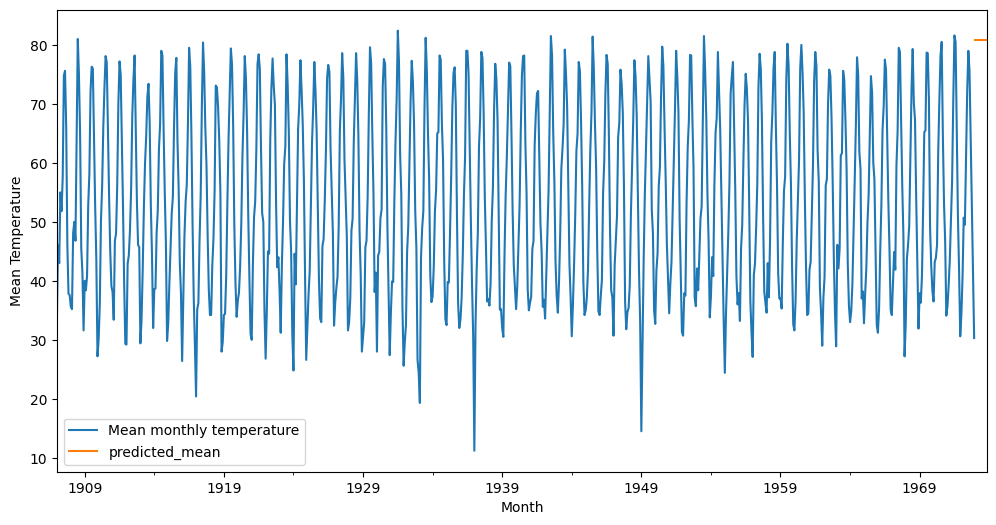

In [ ]:
plot_time_series(mean_temp, forecast)

<hr>

**Observation**:
- This baseline model has an MSE of 967.95 and RMSE of 31.11. This is a very high MSE and RMSE, considering that the range of the dataset is only from 11 to 82. This means that the model makes mistakes that is as large as 967. We will try to optimize this by using grid seach. We can also see from the graph above that the forecasted values does not conform to the shape of the previous data.

<hr>

## Optimize ARIMA model

- We can optimize an ARIMA model using grid search. For this grid search, we will be using values ranging from 0 to 11 for p, 0 to 4 for d, and 0 to 4 for q. Then we will display the best score at the end of the grid search. We will use this score to train another model and we will look at the results of it.

In [ ]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(mean_temp) * 0.75)
  train_data, test_data = mean_temp[0:train_size], mean_temp[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model = ARIMA(train_data, order = arima_order)
  results = model.fit()
  forecast = results.predict(len(mean_temp), len(mean_temp)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(mean_temp, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))


In [ ]:
p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(mean_temp.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=244.680
ARIMA(0, 0, 1) MSE=243.522
ARIMA(0, 0, 2) MSE=241.414
ARIMA(0, 0, 3) MSE=240.950
ARIMA(0, 1, 0) MSE=495.038
ARIMA(0, 1, 1) MSE=563.035
ARIMA(0, 1, 2) MSE=762.177
ARIMA(0, 1, 3) MSE=241.417
ARIMA(0, 2, 0) MSE=1244065.976
ARIMA(0, 2, 1) MSE=1228064.280
ARIMA(0, 2, 2) MSE=1375959.214
ARIMA(0, 2, 3) MSE=1226.256
ARIMA(0, 3, 0) MSE=75530369.710
ARIMA(0, 3, 1) MSE=1146838.733
ARIMA(0, 3, 2) MSE=1228565.660
ARIMA(0, 3, 3) MSE=1377435.736
ARIMA(1, 0, 0) MSE=244.502
ARIMA(1, 0, 1) MSE=242.878
ARIMA(1, 0, 2) MSE=242.032
ARIMA(1, 0, 3) MSE=241.498
ARIMA(1, 1, 0) MSE=927.784
ARIMA(1, 1, 1) MSE=967.960
ARIMA(1, 1, 2) MSE=242.927
ARIMA(1, 1, 3) MSE=242.089
ARIMA(1, 2, 0) MSE=1304343.983
ARIMA(1, 2, 1) MSE=1337791.293
ARIMA(1, 2, 2) MSE=1669.403
ARIMA(1, 2, 3) MSE=1745.212
ARIMA(1, 3, 0) MSE=348687748.241
ARIMA(1, 3, 1) MSE=1318901.869
ARIMA(1, 3, 2) MSE=1359081.389
ARIMA(1, 3, 3) MSE=1237604.102
ARIMA(2, 0, 0) MSE=235.314
ARIMA(2, 0, 1) MSE=184.648
ARIMA(2, 0, 2) MSE=16.30

In [ ]:
warnings.filterwarnings("ignore")
order = (3, 0, 3)
mse, rmse, forecast = evaluate_arima_with_order(mean_temp, order,10)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 15.662469948959755
RMSE: 3.9575838524230607


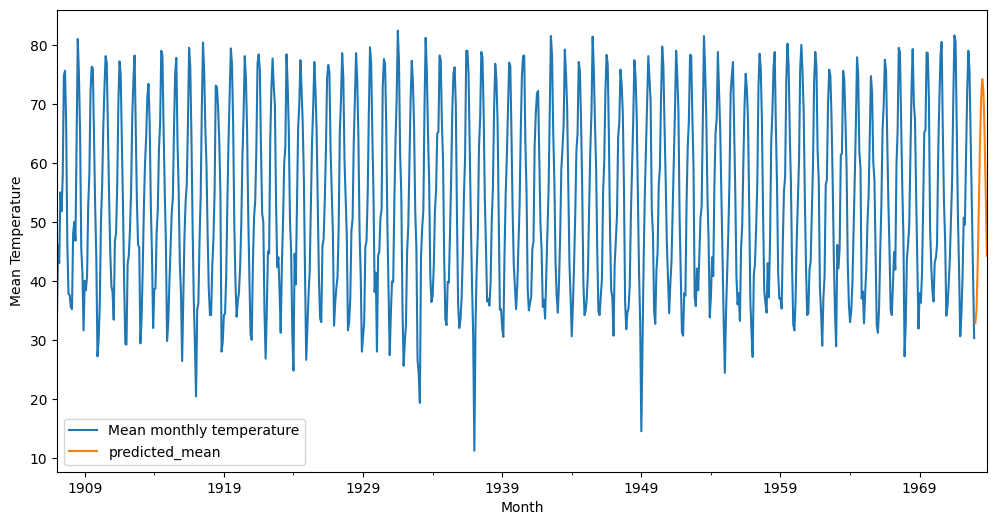

In [ ]:
plot_time_series(mean_temp, forecast)

In [ ]:
warnings.filterwarnings("ignore")
order = (3, 0, 3)
mse, rmse, forecast = evaluate_arima_with_order(mean_temp, order,50)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 15.662469948959755
RMSE: 3.9575838524230607


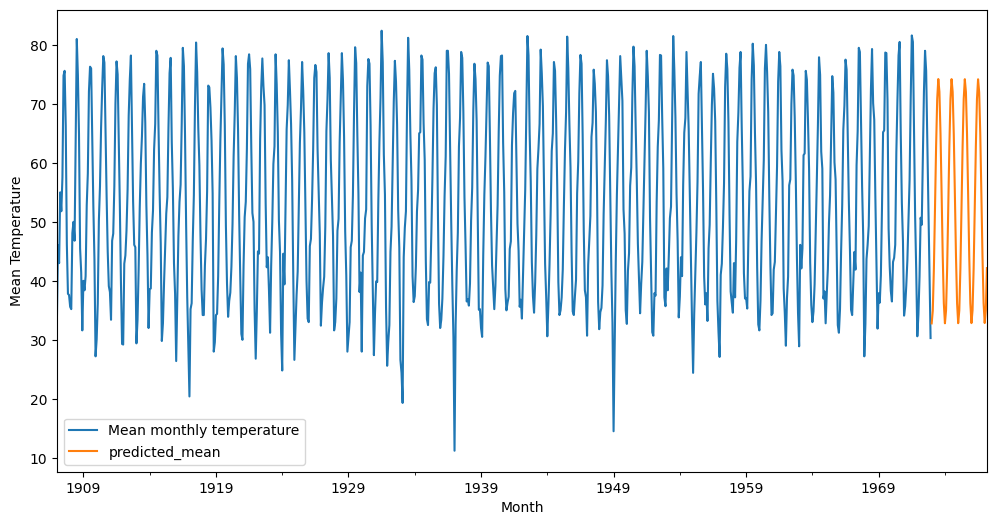

In [ ]:
plot_time_series(mean_temp, forecast)

<hr>

**Observation**:
- From the results and graph above, we can see that we have found the best values for the order of the p,d,q of the ARIMA model by using grid search. The best values for p,d,q is (3,0,2), which has 15 MSE and 3 RMSE. This is a pretty good fit for the dataset and we can also observe from the graph that the line of the forecasted data conforms to the previous lines, which means that the model is accurate in forecasting the future values.

<hr>

# Summary / Conclusion

<hr>

**Summary**:
- For this activity, I did time-series forecasting and utilized models like ARIMA and SARIMAX. The first thing I did was to import a time-series dataset which has dates as its index. And then I did a stationarity check using the ADFuller test which uses null hypothesis to check if the dataset is stationary or not.
- For the first dataset, I found out that it is non-stationary, meaning it has trend and seasonality. Then the next thing I did was to use differencing to remove the trend and seasonality of the data. Then I also looked at the autocorrelation plot of the lags and the correlation value. By doing this, I found out that previous values do not have a strong relationship with values that has large gap from them.
- After that, I trained the ARIMA model and noticed that this model is not really suitable for non-stationary data. I even did grid search as an attempt to improve the ARIMA model, which I successfully did, but there are still some discrepancy with the expected output. That's the reason why I tried to use SARIMAX because this model is for datasets with trend and seasonality. After using SARIMAX, the values become more accurate and the predicted values for future dates continued the trend and seasonality of the previous values.
- For the supplementary activity, I did the same steps as from the procedural activity. The difference is that I did some cleaning for the dataset because there are NaN values and object values. The next difference is that after using the ADFuller test, I discovered that this dataset is stationary. This means that I do not have to use differencing to remove the trend and seasonality. Then I trained the model, printed the summary statistics and looked at the RMSE and MSE of the test.
- The baseline model of the supplementary activity is not well-fitted, so I used grid search and found out that the best value for the p,d,q is (3,0,2). Then I used this to forecast data and the MSE and RMSE significantly went down. The graph also conformed to the shapes of the previous lines. I did some forecasting for additional steps, and it shows that the model is consistent.

<hr>

<hr>

**Conclusion**:
- Overall, I really enjoyed this activity and the process of reading the different tips and tricks regarding time-series forecasting. I also enjoyed watching youtube videos and learning new things and not getting overwhelmed by a lot of complext concepts because of people who explain it really well in youtube videos. For me, the important thing in data science is to understand the concept and the use of different functions and codes. It is very hard to wrap your head around new concepts and new codes without someone guiding you, so I am thankful for the people that paved the way for this new knowledge. I am hoping that I will be doing new activities like this in the future and I hope that I will be able to apply this knowledge in real-life.

<hr>

# References
- [1]“pandas.read_csv — pandas 0.25.3+0.g43013d49f.dirty documentation,” Pydata.org, 2019. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
- [2]Brownlee, J. (2020, April 30). How to load and explore Time Series data in Python. MachineLearningMastery.com. https://machinelearningmastery.com/load-explore-time-series-data-python/
- [3]J. Brownlee, “How to Check if Time Series Data is Stationary with Python,” Machine Learning Mastery, Dec. 29, 2016. https://machinelearningmastery.com/time-series-data-stationary-python/
- [4]J. Brownlee, “How to Difference a Time Series Dataset with Python,” MachineLearningMastery.com, Feb. 21, 2017. https://machinelearningmastery.com/difference-time-series-dataset-python/
- [5]R. J. Hyndman and G. Athanasopoulos, Forecasting : Principles and Practice, 2nd ed. Heathmont, Vic.: Otexts, 2018. Available: https://otexts.com/fpp2/
- [6] J. Brownlee, “How to create an ARIMA model for time series forecasting in Python,” MachineLearningMastery.com, Nov. 18, 2023. https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/#:~:text=The%20parameters%20of%20the%20ARIMA,of%20the%20moving%20average%20window.